In [1]:
#Load the dataset
from google.colab import files
uploaded = files.upload()

Saving flipkart_reviews_dataset.csv to flipkart_reviews_dataset.csv


In [2]:
#load the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#read the dataset
data = pd.read_csv('flipkart_reviews_dataset.csv')
print(data.head())

         product_id                                      product_title  \
0  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
1  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
2  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
3  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
4  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   

   rating            summary  \
0       5  Terrific purchase   
1       5  Terrific purchase   
2       5             Super!   
3       5             Super!   
4       5  Terrific purchase   

                                              review       location  \
0  1-more flexible2-bass is very high3-sound clar...        Shirala   
1     Super sound and good looking I like that prize  Visakhapatnam   
2  Very much satisfied with the device at this pr...      Kozhikode   
3  Nice headphone, bass was very good and sound i...          Jaora   
4  Soun

In [4]:
print(data.isnull().sum())

product_id          0
product_title       0
rating              0
summary             0
review              0
location         1293
date                0
upvotes             0
downvotes           0
dtype: int64


In [5]:
data.dropna(inplace=True)

In [6]:
#cleaning the data
import nltk
import re

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')

from nltk.corpus import stopwords
import string

stopword = set(stopwords.words('english'))

def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

data['Review'] = data['review'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
#analysis acc to rating
ratings = data['rating'].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,
                values=quantity,
                names=numbers,
                hole=0.5)
figure.show()

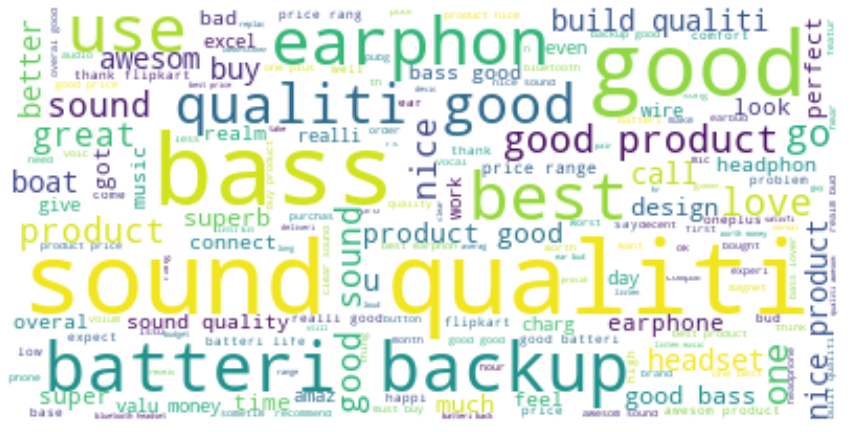

In [8]:
#kind of reviews people leave
text = ' '.join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
#reviewing according to positive,negative and neutral sentiments
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['Review']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['Review']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['Review']]
data = data[['Review', 'Positive', 'Negative', 'Neutral']]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                              Review  Positive  Negative  \
0  -more -bass -sound clariti good -batteri back ...     0.226     0.122   
1                   super sound good look like prize     0.863     0.000   
2  much satisfi devic price point awesom brand. d...     0.223     0.071   
3  nice headphone, bass good sound clear. purchas...     0.394     0.057   
4  sound qualiti super batteri backup super quali...     0.634     0.000   

   Neutral  
0    0.653  
1    0.137  
2    0.707  
3    0.548  
4    0.366  


In [10]:
#what reviewers think about the product
x = sum(data['Positive'])
y = sum(data['Negative'])
z = sum(data['Neutral'])

def sentiment_score(a, b, c):
  if (a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

sentiment_score(x, y, z)

Neutral


In [11]:
#total score of pos, neg, neu sentiments
print('Positive : ', x)
print('Negative : ', y)
print('Neutral : ', z)

Positive :  3175.134000000041
Negative :  415.445
Neutral :  4489.410999999927
